# Nagłówek

Mateusz Machaj, Matematyka Stosowana, rok I, PWr


Laboratoria Wstępu do Informatyki i Programowania


Rozwiązania listy 4


30.11.2020r.


---

W poniższych sekcjach przedstawiam moje rozwiązania listy 4 oraz opis działań wraz z wnioskami.

# Zadanie 1.

Sprawdzam wynik działania **n/100\*100-n** dla **n** z zakresu **1 - 50**. (Oczywiście wśród tych wyników będzie szukane 7/100\*100-n):

In [52]:
for i in range(1, 51):
  print(i, ' -- ', i/100*100-i)

1  --  0.0
2  --  0.0
3  --  0.0
4  --  0.0
5  --  0.0
6  --  0.0
7  --  8.881784197001252e-16
8  --  0.0
9  --  0.0
10  --  0.0
11  --  0.0
12  --  0.0
13  --  0.0
14  --  1.7763568394002505e-15
15  --  0.0
16  --  0.0
17  --  0.0
18  --  0.0
19  --  0.0
20  --  0.0
21  --  0.0
22  --  0.0
23  --  0.0
24  --  0.0
25  --  0.0
26  --  0.0
27  --  0.0
28  --  3.552713678800501e-15
29  --  -3.552713678800501e-15
30  --  0.0
31  --  0.0
32  --  0.0
33  --  0.0
34  --  0.0
35  --  0.0
36  --  0.0
37  --  0.0
38  --  0.0
39  --  0.0
40  --  0.0
41  --  0.0
42  --  0.0
43  --  0.0
44  --  0.0
45  --  0.0
46  --  0.0
47  --  0.0
48  --  0.0
49  --  0.0
50  --  0.0


Jak widać większość wyników to oczekiwane 0. Jednakże dla **n=7** pojawia się pierwsza niedokładność - jedynie rzędu 10^(-15), a więc niewiele różniąca się od 0. Mimo to wyświetlone wartości nie są identyczne.



To samo dzieje się dla **14=7\*2** i **28=7\*2^2** oraz **29** lecz tu wartość jest ujemna więc domyślamy się, że błąd jest skojarzony z n=28. Nie dziwi taki "wybór" kolejnych liczb, gdyż programowanie opiera się na **systemie bianarnym**. 


Omawiane 7 w systemie binarnym prezentuje się następująco:

> 01000000111000000000000000000000

W przypadku 14 sytuacja wygląda tak:
> 01000001111000000000000000000000

A u 28:
>01000001111000000000000000000000

Zmieniają się konfiguracje 8 i 9 bitu.

Powodem tego błędu jest sposób zapisu liczb typu **zmiennoprzecinkowych** - w używanym systemie binarnym nie ma możliwości wyrażenia wielu wartości np. z cyframi na dalekim  miejscu po zerze. System kodowania o którym mowa to dokładniej **IEEE-754**.

Weźmy **1.00000726**. Będzie wyrażone w pamięci dokładnie tak samo jak choćby **1.00000722** przez:

> 00111111100000000000000000111101

Gdzie tak na prawdę przechowywana jest liczba **1.00000727176666259765625**. W rozpatrywanym przypadku dostajemy błąd rzędu 10^(-8). Spróbujmy zidentyfikować miejsce powstawania błędu przy naszej siódemce.



In [53]:
print(7/100)
print(7/100*100)

0.07
7.000000000000001


Jak widać problem pojawia się na etapie mnożenia 0.07\*100. Wynik 7.000000000000001 będzie bitowo reprezetnowany identycznie jak 7.0 więc tylko na poziomie reprezentacji dziesiętnej możemy mowić o błędzie.

# Zadanie 2


Dla listy elementów: **-2, -10, 2, 10** i **N = 60** tworzę wykresy sum częściowych w zależności od n z zakresu (0,N). Widać oczywiście, że szeregi są zbieżne do pożądanej wartości **exp(x)**, która z resztą - wyliczona dzięki bibliotece numpy - figuruje na wykresach jako odnośnik. 

Wykresy są w osobnych oknach dla lepszej czytelności, a wraz z każdym oknem podano dla jakiego **x** jest dana reprezentacja graficzna, wartość **dokładna** oraz **obliczona** (przy N = 60) oraz **błąd względny**.

Dla x = -2 :
Wartość obliczona przy N = 60:  0.13533528323661276
Wartość dokładna:  0.1353352832366127 

BŁĄD WZGLĘDNY:  4.101750105639873e-16 



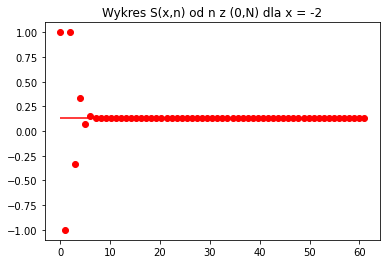


__________________________________________________

Dla x = -10 :
Wartość obliczona przy N = 60:  4.5399929433607724e-05
Wartość dokładna:  4.5399929762484854e-05 

BŁĄD WZGLĘDNY:  7.2440008560647795e-09 



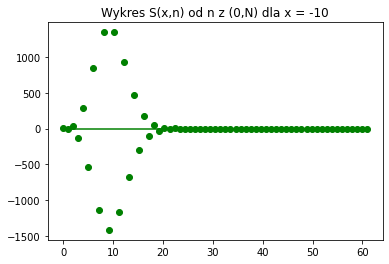


__________________________________________________

Dla x = 2 :
Wartość obliczona przy N = 60:  7.389056098930649
Wartość dokładna:  7.38905609893065 

BŁĄD WZGLĘDNY:  2.4040375598952704e-16 



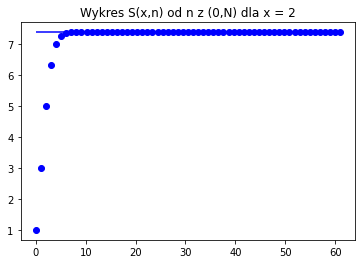


__________________________________________________

Dla x = 10 :
Wartość obliczona przy N = 60:  22026.46579480671
Wartość dokładna:  22026.465794806718 

BŁĄD WZGLĘDNY:  3.3032796463874436e-16 



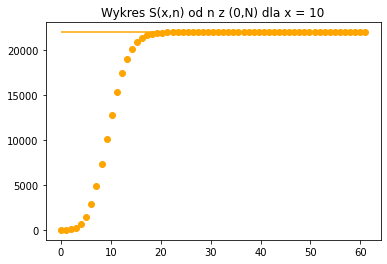


__________________________________________________



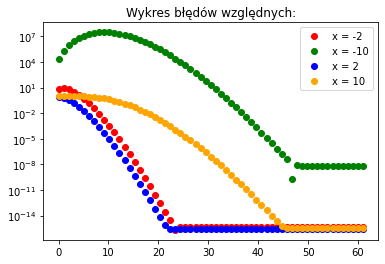

In [54]:
import math
import matplotlib.pyplot as plt
import numpy as np

N = 60
x_list = [-2, -10, 2, 10]

def prt_sum(x, prec):
  '''
  function that calculates partial sums of x^i / i! for each N in some range - approximation of e^x
  :param x: index of power
  :param prec: maximal N - precision in result
  :return: list of sums for each N up to maximal N
  '''
  sum = []
  for i in range(0, prec+1):
    temp = x**i / math.factorial(i)   # using our formula and write results for each N down in list
    if i > 0:
      sum.append(temp + sum[i-1])
    else:
      sum.append(temp)         
  return sum

def plting(values, prec):
  '''
  void function printing results, graphs, and information about accuracy
  :param values: table of x-es (indexes of e^x)
  :param prec:  maximal N - precision in calculations
  '''
  colors = ['red', 'green', 'blue', 'orange', 'yellow']     # list of colors we use later
  absc = np.linspace(0,prec+1,prec+1)                       # values for x-axis

  # printing the result for each element in table od x
  for i in range(0, len(values)):                           
    ps = prt_sum(values[i], prec)                           # receiving table of sums for given x and N
    ord = np.asarray(ps)                                    # values for y-axis
    plt.plot(absc, ord, 'o', color = colors[i%5])           # graph defining
    exact_val = np.exp(values[i])                           # chcecking the exact value and marking it using horizontal line
    plt.hlines(exact_val, 0, prec+1, color = colors[i%5], linestyles='solid')
    print('Dla x =',values[i], ':')                         # results and relative error
    print('Wartość obliczona przy N = 60: ', ps[-1])
    print('Wartość dokładna: ', exact_val,'\n')
    print('BŁĄD WZGLĘDNY: ', abs(exact_val-ps[-1])/exact_val,'\n')
    plt.title('Wykres S(x,n) od n z (0,N) dla x = '+str(values[i]), fontdict=None, loc='center', pad=None)
    plt.show()
    print('\n__________________________________________________\n')

 
  for i in range(0, len(values)):
    exact_val = np.exp(values[i])
    re = []
    for j in prt_sum(values[i], prec):
      re.append(abs(exact_val-j)/exact_val)
    ord2 = np.asarray(re)
    plt.yscale('log')
    plt.title('Wykres błędów względnych:', fontdict=None, loc='center', pad=None)
    plt.plot(absc, ord2, 'o', color = colors[i%5], label = 'x = '+str(values[i]))
    plt.legend()


plting(x_list, N)

Szczególnie na ostatnim wykresie podsumowującym widać, że największy błąd istnieje przy -10, pozostałe wartości mają błędy rzędu takiego jak epsilon w pythonie więc możemy je pominąć. Liczba -2 widocznie nie jest jeszcze aż tak mała, by powodować zauważalne niepewności, ale już przy -10 widzimy zmiany. Jest to związane z definicją potęgowania - ujemny wykładnik oznacza pewną potęgę o dodatnim wykładniku odwrotności danej liczby. 1/e < 1 więc im większy moduł z x tym bliższa omawiana wartość jest zeru.

W poprzednim zadaniu omówione jest, że przez niemożliwość zapisu wielu liczb zmiennoprzecinkowych w systemie binarnym otrzymujemy tego typu błędy. Wykonując działania na liczbach bliskich zeru możemy się zatem spodziewać, że wystąpią błędy związane z dokładnością. (mówimy wszak o błędzie względnym)

*Adnotacja: przy liczeniu wartości sumy częściowej można było także skorzystać z numpy.sum(), ale nie zmieniało to znacząco rezultatu.*

# Zadanie 3

Sprawdzamy obie wersje wzorów danych w zadaniu, w celu sprawdzenia która jest bezpieczniejsza ze względu na możliwość pojawienia się błędu przekroczenia zakresu:

In [55]:
import numpy as np

x = np.power(9.8, 201)
y = np.power(10.2, 199)

def ver1(a, b):
  '''
  first method of calculating z given in the task
  :param a: x
  :param b: y
  :return: z (result)
  '''
  return np.sqrt((np.power(a,2)+np.power(b,2)))
def ver2(a, b):
  '''
  second method of calculating z given in the task
  :param a: x
  :param b: y
  :return: z (result)
  '''
  return b*np.sqrt((np.power((a/b),2)+1))

print('Wersja 1.  ', ver1(x, y))
print('Wersja 2.  ', ver2(x, y))

Wersja 1.   inf
Wersja 2.   5.1484641753866745e+200


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]


Od razu widać, że **znacznie bezpieczniejsza jest druga metoda obliczania**. Pierwsza zwraca wartość inf - mamy do czynienia z błędem przekroczenia zakresu. Jeśli podniesiemy do kwardatu iloraz tych iczb, unikniemy potęgowania ogromnej wartości.

# Zadanie 4


Sprawdzamy funkcjonowanie dwóch zaproponowanych w zadaniu sposobów obliczania pewnych wartości x1, x2. Skupimy się potem na analizie wyników, w celu stwierdzenia, który z nich jest bezpieczniejszy pod względem problemu utraty cyfr znaczących: 

In [56]:
import numpy as np

a, c = 1, 1
b_start, b_end = np.power(10, 7.4), np.power(10, 8.5)
steps = 100

def merge(list1, list2): 
  '''
  transforming two lists into list of tuples
  :param list1: first list
  :param list2: second list
  :return: list of merged lists with ordinal numbers
  '''
  merged_list = [(i+1, list1[i], list2[i]) for i in range(0, len(list1))] 
  return merged_list

def b_list(start, end, stp):
  '''
  trfunction that divides given range into list of expected number of values in it
  :param start: first value in range 
  :param end: last value in range
  :param stp: number of steps
  :return: list of values
  '''
  b = [] 
  delta = (end-start)/stp  # gap between values
  for i in range(0, stp):
    b.append(i*delta+start)
  return b

def sign(val):
  '''
  function that returns information about sign of the number
  :param val: a number 
  :return: sign information in the shape of 1, 0 or -1 
  '''
  if val>0:
    return 1
  elif val<0:
    return -1
  return 0

def ver1(p, q_l, r):
  '''
  first method of calculating x1 and x2 from in the task
  :param p: value a
  :param q: list of b values
  :param r: value c
  :return: list of tuples (x1, x2) for each b
  '''
  x1 = []
  x2 = []
  for i in range(0, len(q_l)):
    q = q_l[i]                  # letting q be proper value from b list - for clarity
    x1.append(1/(2*p)*(-q-sign(q)*np.sqrt(np.power(q, 2)-4*p*r)))
    x2.append(1/(2*p)*(-q+sign(q)*np.sqrt(np.power(q, 2)-4*p*r)))
  return merge(x1, x2)

def ver2(p, q_l, r):
  '''
  first method of calculating x1 and x2 from in the task
  :param p: value a
  :param q: list of b values
  :param r: value c
  :return: list of tuples (x1, x2) for each b
  '''
  x1 = []
  x2 = []
  for i in range(0, len(q_l)):
    q = q_l[i]                  # letting q be proper value from b list - for clarity
    x1.append(1/(2*p)*(-q-sign(q)*np.sqrt(np.power(q, 2)-4*p*r)))
    x2.append(r/(p*x1[i]))
  return merge(x1, x2)

print('Wyniki pracy obu metod obliczania. W krotkach figurują kolejno - liczba porządkowa wyniku, x1, x2.')
print('--------------------------------------------------------------------------------------------------')
print('Metoda pierwsza: ', ver1(a,b_list(b_start, b_end, steps),c))
print('Metoda druga: ', ver2(a,b_list(b_start, b_end, steps),c))

Wyniki pracy obu metod obliczania. W krotkach figurują kolejno - liczba porządkowa wyniku, x1, x2.
--------------------------------------------------------------------------------------------------
Metoda pierwsza:  [(1, -25118864.315095782, -3.91155481338501e-08), (2, -28029953.332113206, -3.5390257835388184e-08), (3, -30941042.349130634, -3.3527612686157227e-08), (4, -33852131.366148055, -2.9802322387695312e-08), (5, -36763220.38316548, -2.60770320892334e-08), (6, -39674309.4001829, -2.60770320892334e-08), (7, -42585398.417200334, -2.2351741790771484e-08), (8, -45496487.43421775, -2.2351741790771484e-08), (9, -48407576.45123517, -2.2351741790771484e-08), (10, -51318665.4682526, -1.862645149230957e-08), (11, -54229754.48527002, -1.862645149230957e-08), (12, -57140843.50228745, -1.4901161193847656e-08), (13, -60051932.51930487, -1.862645149230957e-08), (14, -62963021.53632228, -1.4901161193847656e-08), (15, -65874110.553339705, -1.4901161193847656e-08), (16, -68785199.57035713, -1.4901

Gdy porównamy wartości otrzymane w obu przypadkach, przy początkowych wynikach nie widać specjalnej różnicy. Jednakże, wraz ze zwiększaniem się wartości b można zaobserwować w wynikach pierwszej metody obliczania zbliżanie się x2 do zera, aż w końcu kilka kolejnych x2 jest dokładnie zerem *(należy przewinąć pasek konsoli do końca)*. Druga metoda natomiast pokazuje w tych miejscach liczby z cyframi po przecinku.

Można stąd wysnuć wniosek, że **drugi sposób obliczania jest bezpieczniejczy ze wględu na możliwość utraty cyfr znaczących**.